# Project 1: Driving Licenses, Traffic Accidents and Casualties Analysis

## Problem Statment



Traffic accidents are the main problem in the Kingdom of Saudi Arabia, which has increased over the past years in various regions, and there are also many license holders during the past years from different regions in the Kingdom of Saudi Arabia, and by knowing the percentage of license holders in each region that can be find out the number of drivers per year, knowing the rates of traffic accidents and checking them to find solutions.

## Executive Summary

In 2021, I began to analyze and study traffic accidents and driving licenses datasets in the Kingdom of Saudi Arabia in order to an exploration of the regions that record the highest rate of traffic accidents during the past years, this dataset contains data up to 2017.  The dataset was cleaned, analysis by graphs and statistical calculations were used.  I would like to find in the end of study and analyze this data to recommends some solutions to reduce accidents in Saudi Arabia.

### Contents:
- [Datasets Description](#Datasets-Description)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here, including any Jupyter magic commands*

In [1]:
# Some imports for the project 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


from math import sqrt
#Setting display format to retina in matplotlib to see better quality images.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

## Datasets Description

[Driving Licenses](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-driving-licenses-issued-in-the-kingdom-2004-2008/information/?disjunctive.administritive_area&sort=time_period&location=5,24.37495,45.08024&basemap=jawg.streets)
This dataset contains Saudi Arabia Driving Licenses Issued By Administrative Area for 1993 - 2016. Data from General Authority for Statistics . Follow datasource.kapsarc.org for timely data to advance energy economics research.

[Traffic Accidents and Casualties](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-traffic-accidents-and-casualties-injured-dead-2008/export/?disjunctive.region&disjunctive.indicator&sort=time_period)
This dataset contains Saudi Arabia Traffic Accidents and Casualties by Region for 2016. Data from General Authority for Statistics. Follow datasource.kapsarc.org for timely data to advance energy economics research.


## Data Import and Cleaning

#### 1. Read In Driving Licenses & Traffic Accidents Data
Read in the `saudi-arabia-traffic-accidents-2008.csv` and `saudi-arabia-driving-licenses-2004-2008.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
traffic_accidents = pd.read_csv('../data/saudi-arabia-traffic-accidents-2008.csv',index_col=None)
driving_licenses = pd.read_csv('../data/saudi-arabia-driving-licenses-2004-2008.csv', index_col=0)

#### 2. Display data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
traffic_accidents.head(10)

,;Unnamed: 0;Year;Region;Indicator;Value;geo_point_2d
0;0;(2016);Makkah;No. of Casualties - Injured;12383n;21.628962766,41.263690
1;1;(2016);Eastern Region;No. of Casualties - Dead;1113n;23.2883307307,50.147830
2;2;(2016);Tabouk;No. of Casualties - Dead;434n;27.90165499,37.259858
3;3;(2016);Hail;No. of Casualties - Dead;299n;27.400845724,41.440696
4;4;(2016);Hail;No. of Accidents;10199n;27.400845724,41.440696
5;5;(2016);Northern Boarder;No. of Casualties - Dead;193n;30.197074783,41.817119
6;6;(2017);Jazan;No. of Accidents;22161n;17.2072313962,42.652581
7;7;(2017);Al-Jouf;No. of Accidents;10469n;29.9677445762,39.557037
8;8;(2017);Total;No. of Casualties - Dead;7489n;,NaN
9;9;(2016);Northern Boarder;No. of Casualties - Injured;631n;30.197074783,41.817119


In [4]:
traffic_accidents.shape

(84, 1)

In [5]:
traffic_accidents.columns

Index([';Unnamed: 0;Year;Region;Indicator;Value;geo_point_2d'], dtype='object')

In [6]:
driving_licenses.head(10)

,;Year;Administritive Area;Driving Liceses;geo_point_2d
0;(2012);Makkah;143954n;21.628962766,41.263690
1;(1994);Makkah;75349n;21.628962766,41.263690
2;(1998);Makkah;86082n;21.628962766,41.263690
3;(2004);Makkah;86636n;21.628962766,41.263690
4;(2005);Makkah;65099n;21.628962766,41.263690
5;(2008);Makkah;77013n;21.628962766,41.263690
6;(2014);Madinah;31447n;24.927534539,39.491824
7;(2013);Madinah;28513n;24.927534539,39.491824
8;(2012);Madinah;14459n;24.927534539,39.491824
9;(1994);Madinah;3767n;24.927534539,39.491824


In [7]:
driving_licenses.shape

(350, 1)

In [8]:
driving_licenses.columns

Index([';Year;Administritive Area;Driving Liceses;geo_point_2d'], dtype='object')

#### 3. Briefly describe the data

Take your time looking through the data and briefly describe the data in the markdown cell below. Note things about what the columns might mean, and the general information that is conveyed in the dataframe.

Answer: 

Traffic_accident and driving_licenses datasets are:

* Thay have index: unnamed and have importent values of these datast sprated with ';'
* Traffic_accident Column(;Unnamed: 0;Year;Region;Indicator;Value;geo_point_2d): An column for Total of numbers
* driving_licenses Column(;Year;Administritive Area;Driving Liceses;geo_point_2d): An column for Total of numbers
* Both files contain one column and one row, as the columns are not named correctly, so each column will be renamed
* The traffic accident file contains Index: 84 entries. The file shape(84, 1) needs to formatted to wide the table
* The driver's licenses file contains the Index: 350 entries.  The file shape (350, 1) needs to split the entities and clean    the table

The conclusion is that I have to rename and split new columns so that the tables will look right


#### 4a. How complete is the data?

Investigate missing values etc.

In [9]:
print('Ther are {} missing value in traffic_accidents dataframe'.format(traffic_accidents.isnull().sum().sum()))
traffic_accidents.describe()

Ther are 6 missing value in traffic_accidents dataframe


,;Unnamed: 0;Year;Region;Indicator;Value;geo_point_2d
count,78.000000
mean,42.602789
std,3.270216
min,37.259858
25%,41.263690
50%,41.817119
75%,43.343000
max,50.147830


In [10]:
print('Ther are {} missing value in traffic_accidents dataframe'.format(driving_licenses.isnull().sum().sum()))
driving_licenses.describe()

Ther are 25 missing value in traffic_accidents dataframe


,;Year;Administritive Area;Driving Liceses;geo_point_2d
count,325.000000
mean,42.602789
std,3.254196
min,37.259858
25%,41.263690
50%,41.817119
75%,43.343000
max,50.147830


#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each dataset? What is the maximum *possible* value?**

In [11]:
print('The minimum value of traffic_accidents dataframe is:{} '.format(traffic_accidents.describe().min().min()))

print('The maximum value of traffic_accidents dataframe is:{}'.format(traffic_accidents.describe().max().max()))

The minimum value of traffic_accidents dataframe is:3.2702158502819754 
The maximum value of traffic_accidents dataframe is:78.0


In [12]:
print('The minimum value of driving_licenses dataframe is:{} '.format(driving_licenses.describe().min().min()))

print('The maximum value of driving_licenses dataframe is:{}'.format(driving_licenses.describe().max().max()))

The minimum value of driving_licenses dataframe is:3.254195616982339 
The maximum value of driving_licenses dataframe is:325.0


#### 5. What are your data types? 
Display the data types of each feature. 

In [13]:
print('The data type column of traffic_accidents dataframe is:')
traffic_accidents.dtypes

The data type column of traffic_accidents dataframe is:


;Unnamed: 0;Year;Region;Indicator;Value;geo_point_2d    float64
dtype: object

In [14]:
print('The data type column of driving_licenses dataframe is:')
driving_licenses.dtypes

The data type column of driving_licenses dataframe is:


;Year;Administritive Area;Driving Liceses;geo_point_2d    float64
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:

In these two data sets, all data is confined to one column, as for the row, it collected all the data, and this matter made the data set unclear and incomprehensible.

I want to do some cleaning:

* Add new columns by split the column ";Unnamed: 0;Year;Region;Indicator;Value;geo_point_2d" from traffic_accidents dataset and ";Year;Administritive Area;Driving Liceses;geo_point_2d" column from driving_licenses dataset.
* Drop unnecessary columns for both datasets after the columns selected and assign their values.
* Keep only the data value and change there columns for both dataframe.
* Remove the Unnamed index from these two dataframes.
* Set index in both dataframes.
* Change the data types for each column in the datasets  to be match  with column values of these dataframes.

After cleaning the traffic_accidents dataset and driving_licenses dataset I have to merege the tables of these datasets


#### 6. Fix incorrect data types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert numerical columns to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [15]:
#Befor I start re-type ,I will add new columns and set index 
#Remove the unamed columns from traffic_accidents DataFrame
new_df=' '
new_df=traffic_accidents.columns
columns_line=new_df.str.replace(';Unnamed: 0;Year;Region;Indicator;Value;geo_point_2d' ,'Year,Region,Indicator,Value,geo_point_2d')
columns_line.str.split('\n')

print(columns_line[:3])
traffic_accidents.columns=columns_line[:3]
traffic_accidents.index.name='index1'
traffic_accidents=traffic_accidents.reset_index()
traffic_accidents.head(10)

Index(['Year,Region,Indicator,Value,geo_point_2d'], dtype='object')


,index1,"Year,Region,Indicator,Value,geo_point_2d"
0,0;0;(2016);Makkah;No. of Casualties - Injured;...,41.263690
1,1;1;(2016);Eastern Region;No. of Casualties - ...,50.147830
2,2;2;(2016);Tabouk;No. of Casualties - Dead;434...,37.259858
3,3;3;(2016);Hail;No. of Casualties - Dead;299n;...,41.440696
4,4;4;(2016);Hail;No. of Accidents;10199n;27.400...,41.440696
5,5;5;(2016);Northern Boarder;No. of Casualties ...,41.817119
6,6;6;(2017);Jazan;No. of Accidents;22161n;17.20...,42.652581
7,7;7;(2017);Al-Jouf;No. of Accidents;10469n;29....,39.557037
8,8;8;(2017);Total;No. of Casualties - Dead;7489n;,NaN
9,9;9;(2016);Northern Boarder;No. of Casualties ...,41.817119


In [16]:
df1 = pd.DataFrame(traffic_accidents.index1.str.split(";",7).tolist(),columns =['id','d','Year','Region','Indicator','Value','geo_point_2d'])
traffic_accidents=traffic_accidents.join(df1)

traffic_accidents.head(3)


,index1,"Year,Region,Indicator,Value,geo_point_2d",id,d,Year,Region,Indicator,Value,geo_point_2d
0,0;0;(2016);Makkah;No. of Casualties - Injured;...,41.263690,0,0,(2016),Makkah,No. of Casualties - Injured,12383n,21.628962766
1,1;1;(2016);Eastern Region;No. of Casualties - ...,50.147830,1,1,(2016),Eastern Region,No. of Casualties - Dead,1113n,23.2883307307
2,2;2;(2016);Tabouk;No. of Casualties - Dead;434...,37.259858,2,2,(2016),Tabouk,No. of Casualties - Dead,434n,27.90165499


In [17]:
traffic_accidents.drop('index1',inplace=True , axis=1)
traffic_accidents.head(3)
#traffic_accidents.index.astype(str).str.split(';',expand=True)

,"Year,Region,Indicator,Value,geo_point_2d",id,d,Year,Region,Indicator,Value,geo_point_2d
0,41.263690,0,0,(2016),Makkah,No. of Casualties - Injured,12383n,21.628962766
1,50.147830,1,1,(2016),Eastern Region,No. of Casualties - Dead,1113n,23.2883307307
2,37.259858,2,2,(2016),Tabouk,No. of Casualties - Dead,434n,27.90165499


In [18]:
traffic_accidents=traffic_accidents.assign(g=traffic_accidents['Year,Region,Indicator,Value,geo_point_2d'])

In [19]:
traffic_accidents.drop('Year,Region,Indicator,Value,geo_point_2d',inplace=True , axis=1)
traffic_accidents.head(3)

,id,d,Year,Region,Indicator,Value,geo_point_2d,g
0,0,0,(2016),Makkah,No. of Casualties - Injured,12383n,21.628962766,41.263690
1,1,1,(2016),Eastern Region,No. of Casualties - Dead,1113n,23.2883307307,50.147830
2,2,2,(2016),Tabouk,No. of Casualties - Dead,434n,27.90165499,37.259858


In [20]:
#Now add new columns and split for driving_licenses dataset
new_df=' '
new_df=driving_licenses.columns
columns_line1=new_df.str.replace(';Year;Administritive Area;Driving Liceses;geo_point_2d','col1')
columns_line1.str.split(' ',',')

driving_licenses.columns=columns_line1[:3]
driving_licenses.index.name='index2'
driving_licenses=driving_licenses.reset_index()
driving_licenses.head(10)

,index2,col1
0,0;(2012);Makkah;143954n;21.628962766,41.263690
1,1;(1994);Makkah;75349n;21.628962766,41.263690
2,2;(1998);Makkah;86082n;21.628962766,41.263690
3,3;(2004);Makkah;86636n;21.628962766,41.263690
4,4;(2005);Makkah;65099n;21.628962766,41.263690
5,5;(2008);Makkah;77013n;21.628962766,41.263690
6,6;(2014);Madinah;31447n;24.927534539,39.491824
7,7;(2013);Madinah;28513n;24.927534539,39.491824
8,8;(2012);Madinah;14459n;24.927534539,39.491824
9,9;(1994);Madinah;3767n;24.927534539,39.491824


In [21]:
df2 = pd.DataFrame(driving_licenses.index2.str.split(";",5).tolist(),columns =['id','Year' , 'Administritive_Area' , 'Driving_Liceses' , 'geo_point_2d'])
driving_licenses=driving_licenses.join(df2)
driving_licenses.head(3)

,index2,col1,id,Year,Administritive_Area,Driving_Liceses,geo_point_2d
0,0;(2012);Makkah;143954n;21.628962766,41.26369,0,(2012),Makkah,143954n,21.628962766
1,1;(1994);Makkah;75349n;21.628962766,41.26369,1,(1994),Makkah,75349n,21.628962766
2,2;(1998);Makkah;86082n;21.628962766,41.26369,2,(1998),Makkah,86082n,21.628962766


In [22]:
driving_licenses.drop('index2',inplace=True , axis=1)
driving_licenses.head(3)

,col1,id,Year,Administritive_Area,Driving_Liceses,geo_point_2d
0,41.26369,0,(2012),Makkah,143954n,21.628962766
1,41.26369,1,(1994),Makkah,75349n,21.628962766
2,41.26369,2,(1998),Makkah,86082n,21.628962766


In [23]:
driving_licenses=driving_licenses.assign(g=driving_licenses['col1'])

In [24]:
driving_licenses.drop('col1',inplace=True , axis=1)
driving_licenses.head(3)

,id,Year,Administritive_Area,Driving_Liceses,geo_point_2d,g
0,0,(2012),Makkah,143954n,21.628962766,41.26369
1,1,(1994),Makkah,75349n,21.628962766,41.26369
2,2,(1998),Makkah,86082n,21.628962766,41.26369


In [25]:
#Check the type of each column after splitted
traffic_accidents.dtypes

id               object
d                object
Year             object
Region           object
Indicator        object
Value            object
geo_point_2d     object
g               float64
dtype: object

In [26]:
driving_licenses.dtypes

id                      object
Year                    object
Administritive_Area     object
Driving_Liceses         object
geo_point_2d            object
g                      float64
dtype: object

In [27]:
# Now start to re-type incorrectly typed data in traffic_accidents


traffic_accidents['Year'] = traffic_accidents['Year'].map(lambda cell: cell.replace('(','').replace(')',''))
traffic_accidents['Year'] = traffic_accidents['Year'].astype(int)
# I can convert year into datetype but there is missing of day and month values
#traffic_accidents['Year'] = pd.to_timedelta(traffic_accidents['Year'])
                                    
traffic_accidents['Region'] = traffic_accidents['Region'].astype(str)

#traffic_accidents['Indicator'] = traffic_accidents['Indicator'].map(lambda cell: cell.replace('-',','))
#traffic_accidents[['No_of_Casualtie-Injured', 'No_of_Casualties-Dead' , 'No_of_Accidents' ]]=traffic_accidents.Indicator.astype(str).str.split()
#traffic_accidents['Indicator'] = traffic_accidents['Indicator'].values.tolist()
  
traffic_accidents['Value'] = traffic_accidents['Value'].map(lambda cell: cell.replace('n',' '))
traffic_accidents['Value'] = traffic_accidents['Value'].astype(int)

traffic_accidents['geo_point_2d'] = pd.to_numeric(traffic_accidents['geo_point_2d'], downcast="float")

traffic_accidents.dtypes

id               object
d                object
Year              int32
Region           object
Indicator        object
Value             int32
geo_point_2d    float32
g               float64
dtype: object

In [28]:
# Re-type incorrectly typed data in driving_licenses

driving_licenses['Year'] = driving_licenses['Year'].map(lambda cell: cell.replace('(','').replace(')',''))
driving_licenses['Year'] = driving_licenses['Year'].astype(int)
# I can convert year into datetype but there is missing of day and month values
#driving_licenses['Year'] = pd.to_timedelta(driving_licenses['Year'])
                                    
driving_licenses['Administritive_Area'] = driving_licenses['Administritive_Area'].astype(str)
  
driving_licenses['Driving_Liceses'] = driving_licenses['Driving_Liceses'].map(lambda cell: cell.replace('n',' '))
driving_licenses['Driving_Liceses'] = driving_licenses['Driving_Liceses'].astype(int)

driving_licenses['geo_point_2d'] = pd.to_numeric(driving_licenses['geo_point_2d'], downcast="float")

driving_licenses.dtypes

id                      object
Year                     int32
Administritive_Area     object
Driving_Liceses          int32
geo_point_2d           float32
g                      float64
dtype: object

- Make new columns `x` and `y` using `geo_point_2d`

In [29]:
traffic_accidents[['x']]=traffic_accidents.geo_point_2d.astype(str)
traffic_accidents[['y']]=traffic_accidents.g.astype(str)

In [30]:
traffic_accidents.drop('geo_point_2d',inplace=True , axis=1)
traffic_accidents.drop('g',inplace=True , axis=1)
traffic_accidents.drop('d',inplace=True , axis=1)
traffic_accidents.drop('id',inplace=True , axis=1)

traffic_accidents.head(3)

,Year,Region,Indicator,Value,x,y
0,2016,Makkah,No. of Casualties - Injured,12383,21.628963,41.2636898334
1,2016,Eastern Region,No. of Casualties - Dead,1113,23.28833,50.1478302439
2,2016,Tabouk,No. of Casualties - Dead,434,27.901655,37.2598581394


In [31]:
driving_licenses[['x']]=driving_licenses.geo_point_2d.astype(str)
driving_licenses[['y']]=driving_licenses.g.astype(str)

In [32]:
driving_licenses.drop('geo_point_2d',inplace=True , axis=1)
driving_licenses.drop('g',inplace=True , axis=1)
driving_licenses.drop('id',inplace=True , axis=1)
driving_licenses.head(3)

,Year,Administritive_Area,Driving_Liceses,x,y
0,2012,Makkah,143954,21.628963,41.2636898334
1,1994,Makkah,75349,21.628963,41.2636898334
2,1998,Makkah,86082,21.628963,41.2636898334


- Fix any individual values preventing other columns from being the appropriate type.

In [33]:
traffic_accidents['x'] = traffic_accidents['x'].map(lambda cell: cell.replace('nan','0'))
traffic_accidents['y'] = traffic_accidents['y'].astype(str).replace('nan','0')

In [34]:
traffic_accidents['x'] = traffic_accidents['x'].astype(str).astype(float)

traffic_accidents['y'] = traffic_accidents['y'].astype(str).astype(float)

traffic_accidents.head(3)

,Year,Region,Indicator,Value,x,y
0,2016,Makkah,No. of Casualties - Injured,12383,21.628963,41.263690
1,2016,Eastern Region,No. of Casualties - Dead,1113,23.288330,50.147830
2,2016,Tabouk,No. of Casualties - Dead,434,27.901655,37.259858


In [35]:
driving_licenses['x'] = driving_licenses['x'].map(lambda cell: cell.replace('nan','0'))
driving_licenses['y'] = driving_licenses['y'].astype(str).replace('nan','0')

In [36]:
driving_licenses['x']=driving_licenses['x'].astype(str).astype(float)

driving_licenses['y'] =driving_licenses['y'].astype(str).astype(float)

driving_licenses.head(3)

,Year,Administritive_Area,Driving_Liceses,x,y
0,2012,Makkah,143954,21.628963,41.26369
1,1994,Makkah,75349,21.628963,41.26369
2,1998,Makkah,86082,21.628963,41.26369


- Finish your data modifications by making sure the columns are now typed appropriately.

In [37]:
traffic_accidents.head(3)

,Year,Region,Indicator,Value,x,y
0,2016,Makkah,No. of Casualties - Injured,12383,21.628963,41.263690
1,2016,Eastern Region,No. of Casualties - Dead,1113,23.288330,50.147830
2,2016,Tabouk,No. of Casualties - Dead,434,27.901655,37.259858


In [38]:
driving_licenses.head(3)

,Year,Administritive_Area,Driving_Liceses,x,y
0,2012,Makkah,143954,21.628963,41.26369
1,1994,Makkah,75349,21.628963,41.26369
2,1998,Makkah,86082,21.628963,41.26369


- Display the data types again to confirm they are correct.

In [39]:
traffic_accidents.dtypes
#traffic_accidents.info()

Year           int32
Region        object
Indicator     object
Value          int32
x            float64
y            float64
dtype: object

In [40]:
driving_licenses.dtypes

Year                     int32
Administritive_Area     object
Driving_Liceses          int32
x                      float64
y                      float64
dtype: object

#### 7. Rename columns
Change the names of the columns to more expressive names so that you can tell the difference the Driving Licenses  columns and the & Traffic Accidents columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these two datasets, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).
- Please also fix any typos you see in the column names.

In [41]:
traffic_accidents = traffic_accidents.rename(columns={
                     'Year':'year', 'Region':'region', 
                    'Indicator':'accidents_category', 'Value':'no_of_accidents'
            })

In [42]:
#traffic_accidents.head(3)

In [43]:
driving_licenses = driving_licenses.rename(columns={
                   'id':'id', 'Year':'year',
                   'Administritive_Area':'region', 
                   'Driving_Liceses':'no.driving_liceses'  
})

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

#### Data Dictionary

Explanation of each feature name in the Data Dictionary Entry:

#### Traffic_Accidents Dataset
|Feature|Type|Dataset|Description|
|---|---|---|---|
|**year**|int|Traffic_Accidents|Year of Traffic_Accidents that shows the date and chronology of when it happened| 
|**region**|object|Traffic_Accidents|The region of Traffic_Accidents shows the place of a scene in where the event area| 
|**accidents_category**|object|Traffic_Accidents|Shows a list of No. of Casualties, Injured and No. of Casualties, Dead, also shows No. of Accidents indicated with the region| 
|**no_of_accidents**|int|Traffic_Accidents|The value of Traffic_Accidents shows the sum of numbers of indicators for each region, how many indicators of the region that accident occurred| 
|**x**|float|Traffic_Accidents|Shows the X-coordinates of the geographical location|
|**y**|float|Traffic_Accidents|Shows the Y-coordinates of the geographical location||

#### Driving_Licenses Dataset
|Feature|Type|Dataset|Description|
|---|---|---|---|
|**year**|int|Driving_Licenses|Shows the date of each number of driving licenses per administrative region|
|**Administritive_Area**|object|Driving_Licenses|It displays the administrative areas of all no.driving licenses|
|**no.driving_liceses**|int|Driving_Licenses|The number of driving licenses for each administrative area appears in each year|
|**x**|float|Driving_Licenses|Shows the X-coordinates of the geographical location|
|**y**|float|Driving_Licenses|Shows the Y-coordinates of the geographical location|


#### 9. Drop unnecessary rows

This study concerns accident and license in regions/area. Please do the followings:
0. Which rows are not associated with regions?

A row that is different from the region entities is "Total" and causes false results and should be removed

1. Confirm the numbers of all regions add up to total.
2. Remove the rows that are not associated with regions

In [44]:
traffic_accidents.region.unique()
#Confirm the numbers of all regions add up to total.
traffic_accidents[traffic_accidents.region == 'Total']
#traffic_accidents.groupby("region").sum().sort_values("Total", ascending=False)
traffic_accidents.head(3)

,year,region,accidents_category,no_of_accidents,x,y
0,2016,Makkah,No. of Casualties - Injured,12383,21.628963,41.263690
1,2016,Eastern Region,No. of Casualties - Dead,1113,23.288330,50.147830
2,2016,Tabouk,No. of Casualties - Dead,434,27.901655,37.259858


In [45]:
#Remove the rows that are not associated with regions and duplicate
drop_1 =traffic_accidents[ traffic_accidents['region'] == 'Total' ].index
traffic_accidents.drop(drop_1 , inplace=True)
traffic_accidents.head(3)

,year,region,accidents_category,no_of_accidents,x,y
0,2016,Makkah,No. of Casualties - Injured,12383,21.628963,41.263690
1,2016,Eastern Region,No. of Casualties - Dead,1113,23.288330,50.147830
2,2016,Tabouk,No. of Casualties - Dead,434,27.901655,37.259858


In [46]:
driving_licenses.region.unique()
driving_licenses[driving_licenses.region == 'Total']
driving_licenses.head(3)

,year,region,no.driving_liceses,x,y
0,2012,Makkah,143954,21.628963,41.26369
1,1994,Makkah,75349,21.628963,41.26369
2,1998,Makkah,86082,21.628963,41.26369


In [47]:
dropIndex =driving_licenses[ driving_licenses['region'] == 'Total' ].index
driving_licenses.drop(dropIndex , inplace=True)
driving_licenses.head(3)

,year,region,no.driving_liceses,x,y
0,2012,Makkah,143954,21.628963,41.26369
1,1994,Makkah,75349,21.628963,41.26369
2,1998,Makkah,86082,21.628963,41.26369


#### 10a. Data formats
Is the License data in long or wide format? How about the Accident data? And why?
* The Driving_Licenses dataset in wide format 
* The Traffic_Accidents dataset in long format (lots of entities some columns have to separate)

In [48]:
# As we can see the Driving License data in wide format 
print('The Driving License data in wide format {}'.format(driving_licenses))
# As we can see the Accident data in long format (lots of rows)
print('The Traffic Accident data in long format {}'.format(traffic_accidents))

The Driving License data in wide format      year  region  no.driving_liceses          x          y
0    2012  Makkah              143954  21.628963  41.263690
1    1994  Makkah               75349  21.628963  41.263690
2    1998  Makkah               86082  21.628963  41.263690
3    2004  Makkah               86636  21.628963  41.263690
4    2005  Makkah               65099  21.628963  41.263690
..    ...     ...                 ...        ...        ...
345  2000  Tabouk                8473  27.901655  37.259858
346  2006  Tabouk                8259  27.901655  37.259858
347  2013    Hail                9731  27.400846  41.440696
348  1997    Hail                6606  27.400846  41.440696
349  1999    Hail                3139  27.400846  41.440696

[325 rows x 5 columns]
The Traffic Accident data in long format     year          region           accidents_category  no_of_accidents  \
0   2016          Makkah  No. of Casualties - Injured            12383   
1   2016  Eastern Region   

#### 10b. Changing formats
Which format would work best for both dataframes? Transform the datasets to the same format before merging in the next task.

In [49]:
#traffic_accidents dataset long to wide
#,aggfunc=np.sum ,fill_value=0
traffic_accidents_wide=traffic_accidents.pivot_table(index=['year','region'], columns='accidents_category', values='no_of_accidents',fill_value=0)
#df3=df3.bfill(axis=1)
#df3.reset_index()
traffic_accidents_wide.head(20)


accidents_category     No. of Accidents  No. of Casualties - Dead  \
year region                                                         
2016 Al-Baaha                      3618                       185   
     Al-Jouf                      10212                       245   
     Asir                         32684                       983   
     Eastern Region              101619                      1113   
     Hail                         10199                       299   
     Jazan                        25873                       514   
     Madinah                      14475                       822   
     Makkah                      134838                      2243   
     Najran                        3235                       173   
     Northern Boarder             13196                       193   
     Qassim                       25664                       397   
     Riyadh                      141736                      1430   
     Tabouk                       16031                       434   
2017 Al-Baaha                      1414                       134   
     Al-Jouf                      10469                       240   
     Asir                         25245                       828   
     Eastern Region               81433                       963   
     Hail                          9379                       265   
     Jazan                        22161                       466   
     Madinah                      16070                       580   

accidents_category     No. of Casualties - Injured  
year region                                         
2016 Al-Baaha                                 1227  
     Al-Jouf                                   920  
     Asir                                     2541  
     Eastern Region                           4893  
     Hail                                      932  
     Jazan                                    2259  
     Madinah                                  4184  
     Makkah                                  12383  
     Najran                                    706  
     Northern Boarder                          631  
     Qassim                                   1513  
     Riyadh                                   4207  
     Tabouk                                   1724  
2017 Al-Baaha                                 1007  
     Al-Jouf                                   862  
     Asir                                     2368  
     Eastern Region                           4073  
     Hail                                      773  
     Jazan                                    2207  
     Madinah                                  2917

#### 11. Merge dataframes

Join the Driving Licenses & Traffic Accidents dataframes using the **region** and **year** in each dataframe as the key. Assign this to a new variable. Which join should you use to preserve the most data?

In [50]:
#Before I start to merge I have to make sure that region entities are unique and no duplicate from these two dataframes
traffic_accidents.region.unique()

array(['Makkah', 'Eastern Region', 'Tabouk', 'Hail', 'Northern Boarder',
       'Jazan', 'Al-Jouf', 'Al-Baaha', 'Riyadh', 'Madinah', 'Qassim',
       'Najran', 'Asir'], dtype=object)

In [51]:
driving_licenses.region.unique()

array(['Makkah', 'Madinah', 'Al-Qaseem', 'Eastern', 'Assir', 'Tabouk',
       'Hail', 'Northern Boarder', 'Jazan', 'Najran', 'Al-Baha',
       'Al-Jouf', 'Riyadh'], dtype=object)

In [52]:
#Rename the region entities to be the same names for these two datasets and avoid duplicates
driving_licenses['region']=driving_licenses['region'].replace('Eastern','Eastern Region')
driving_licenses['region']=driving_licenses['region'].replace('Assir','Asir')
driving_licenses['region']=driving_licenses['region'].replace('Al-Qaseem','Qassim')
driving_licenses['region']=driving_licenses['region'].replace('Al-Baha','Al-Baaha')


In [53]:
#I can also replace the region entities name from traffic_accidents 
#traffic_accidents['region']=traffic_accidents['region'].replace('Qassim','Al-Qaseem')
#traffic_accidents['region']=traffic_accidents['region'].replace('Al-Baaha','Al-Baha')


In [54]:
# Now I can merge traffic_accidents_wide with driving_licenses datasets by using outer join to preserve the most data
df_merge=pd.merge(traffic_accidents_wide,driving_licenses ,on=['region' , 'year'],how='outer')

In [55]:
df_merge = df_merge.rename(columns={
                     'No. of Accidents':'no_of_accidents', 'No. of Casualties - Dead':'no_of_casualties_dead', 
                    'No. of Casualties - Injured':'no_of_casualties_injured'
            })
df_merge.head()

,region,year,no_of_accidents,no_of_casualties_dead,no_of_casualties_injured,no.driving_liceses,x,y
0,Al-Baaha,2016,3618.0,185.0,1227.0,4614,20.148405,41.466548
1,Al-Jouf,2016,10212.0,245.0,920.0,9371,29.967745,39.557037
2,Asir,2016,32684.0,983.0,2541.0,41367,19.138784,42.941470
3,Eastern Region,2016,101619.0,1113.0,4893.0,142307,23.288330,50.147830
4,Hail,2016,10199.0,299.0,932.0,54507,27.400846,41.440696


#### 12. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_datasets.csv`.

In [56]:
df_merge.to_csv('combined_datasets.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [57]:
df_merge.describe()

,year,no_of_accidents,no_of_casualties_dead,no_of_casualties_injured,no.driving_liceses,x,y
count,325.000000,26.000000,26.000000,26.000000,325.000000,325.000000,325.000000
mean,2005.000000,38225.692308,635.384615,2743.038462,28915.347692,23.810447,42.602789
std,7.222222,46493.705035,549.783381,2922.641127,47419.058819,4.197988,3.254196
min,1993.000000,1414.000000,112.000000,374.000000,915.000000,17.207232,37.259858
25%,1999.000000,10276.250000,241.250000,923.000000,4846.000000,20.148405,41.263690
50%,2005.000000,16050.500000,415.500000,1618.500000,10267.000000,23.288330,41.817119
75%,2011.000000,30981.250000,929.250000,3784.000000,25423.000000,27.400846,43.343000
max,2017.000000,145541.000000,2243.000000,12383.000000,495307.000000,30.197075,50.147830


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [58]:
def std_cacul(n,v):
    
        dict_1 = dict(n[v])
        mean_1=sum(n[v])*1.0/len(n[v])
        for key, val in enumerate(dict_1.items()):
            std_t=[np.sqrt((sum((val - mean_1)**2)/len(n)))]
            return std_t 
    
std_cacul(df_merge,'no_of_accidents')

[2860.2828904020994]

In [59]:
def mean(cn):
    return (sum(cn) / len(cn))

def variance(cn):
    mean_1 = mean(cn)
    return mean([(x - mean_1) ** 2 for x in cn])

def stddev(cn):
    
    return np.sqrt(variance(cn))

 
stddev(df_merge['no_of_accidents'])


nan

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'Driving_Licenses_x': 120, 'Traffic_Accidents_x': 120, ...}`

In [60]:
#Code:

#numeric_value= ['no_of_accidents', 'no_of_casualties_dead','no_of_casualties_injured','no.driving_liceses']
#sd={i:stddev(numeric_value)[i] for i in numeric_value}



Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer:
When I calculated NumPy standard deviations manully the result was lower than pandas describe standard deviations,
also I faced some nan values and that can solved by choosing numeric values.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)
- Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)
- What are the regions that have more Driving Licenses issued in each year than the year average?
- What are the regions that have more Traffic Accidents happened in each year than the year average?

Based on what you've just observed, have you identified any regions that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

#### Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)

In [61]:
#code
df_merge.head()

,region,year,no_of_accidents,no_of_casualties_dead,no_of_casualties_injured,no.driving_liceses,x,y
0,Al-Baaha,2016,3618.0,185.0,1227.0,4614,20.148405,41.466548
1,Al-Jouf,2016,10212.0,245.0,920.0,9371,29.967745,39.557037
2,Asir,2016,32684.0,983.0,2541.0,41367,19.138784,42.941470
3,Eastern Region,2016,101619.0,1113.0,4893.0,142307,23.288330,50.147830
4,Hail,2016,10199.0,299.0,932.0,54507,27.400846,41.440696


In [62]:
df_merge.nlargest(10,'no.driving_liceses')[['year','region','no.driving_liceses']]

,year,region,no.driving_liceses
24,2017,Riyadh,495307
11,2016,Riyadh,242851
158,2014,Riyadh,194208
82,2013,Riyadh,165994
85,2015,Makkah,157389
110,2011,Eastern Region,151087
89,2014,Makkah,149234
26,2012,Makkah,143954
20,2017,Makkah,142487
3,2016,Eastern Region,142307


In [63]:
df_merge.nsmallest(10,'no.driving_liceses')[['year','region','no.driving_liceses']]

,year,region,no.driving_liceses
205,2015,Tabouk,915
177,2007,Al-Baaha,997
266,1995,Northern Boarder,1318
164,1996,Northern Boarder,1383
267,1994,Northern Boarder,1457
76,1996,Al-Baaha,1468
58,1993,Northern Boarder,1510
268,1997,Northern Boarder,1531
214,2003,Northern Boarder,1705
60,2005,Northern Boarder,1804


###### Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)

In [64]:
mean_tra_2016=df_merge[df_merge['year'] == 2016 ].groupby('region').agg({'no_of_accidents':['mean']}) 
mean_tra_2016.reset_index(inplace=True) 
mean_tra_2016.rename(columns = {'mean':'','no_of_accidents':'mean_accidents_2016'},inplace=True)
mean_tra_2016

,region,mean_accidents_2016
,,
0,Al-Baaha,3618.0
1,Al-Jouf,10212.0
2,Asir,32684.0
3,Eastern Region,101619.0
4,Hail,10199.0
5,Jazan,25873.0
6,Madinah,14475.0
7,Makkah,134838.0
8,Najran,3235.0


In [65]:
mean_tra_2017=df_merge[df_merge['year'] == 2017 ].groupby('region').agg({'no_of_accidents':['mean']}) 
mean_tra_2017.reset_index(inplace=True) 
mean_tra_2017

,region,no_of_accidents
,,mean
0,Al-Baaha,1414.0
1,Al-Jouf,10469.0
2,Asir,25245.0
3,Eastern Region,81433.0
4,Hail,9379.0
5,Jazan,22161.0
6,Madinah,16070.0
7,Makkah,145541.0
8,Najran,3193.0


Now I have to combine between them to find the highest and lowest mean of Traffic Accidents numbers for years (2016 - 2017)

In [66]:
mean_2016_2017 = pd.DataFrame(mean_tra_2016)

In [67]:
mean_2016_2017['mean_accidents_2017'] = mean_tra_2017['no_of_accidents']
mean_2016_2017.head(2)

,region,mean_accidents_2016,mean_accidents_2017
,,,
0,Al-Baaha,3618.0,1414.0
1,Al-Jouf,10212.0,10469.0


In [68]:
mean_2016_2017.nlargest(1,'mean_accidents_2017')[['region','mean_accidents_2017']]

,region,mean_accidents_2017
,,
7,Makkah,145541.0


In [69]:
mean_2016_2017.nlargest(1,'mean_accidents_2016')[['region','mean_accidents_2016']]

,region,mean_accidents_2016
,,
11,Riyadh,141736.0


In [70]:
mean_2016_2017.nsmallest(1,'mean_accidents_2017')[['region','mean_accidents_2017']]

,region,mean_accidents_2017
,,
0,Al-Baaha,1414.0


In [71]:
mean_2016_2017.nsmallest(1,'mean_accidents_2016')[['region','mean_accidents_2016']]

,region,mean_accidents_2016
,,
8,Najran,3235.0


###### What are the regions that have more Driving Licenses issued in each year than the year average?

I  want to compare years to see which regions Driving Licenses issued in each year through define another dataset

In [72]:
df_merge.head()

,region,year,no_of_accidents,no_of_casualties_dead,no_of_casualties_injured,no.driving_liceses,x,y
0,Al-Baaha,2016,3618.0,185.0,1227.0,4614,20.148405,41.466548
1,Al-Jouf,2016,10212.0,245.0,920.0,9371,29.967745,39.557037
2,Asir,2016,32684.0,983.0,2541.0,41367,19.138784,42.941470
3,Eastern Region,2016,101619.0,1113.0,4893.0,142307,23.288330,50.147830
4,Hail,2016,10199.0,299.0,932.0,54507,27.400846,41.440696


In [73]:
df_merge_compa=df_merge

In [74]:
year_comper = df_merge_compa.groupby('year')

In [75]:
df_merge_compa['driving_mean']=year_comper['no.driving_liceses'].transform(np.mean)

Now that I have finished merging the tables,I can compere the driving_liceses and driving_mean based on year

In [76]:
merge_compa_1=df_merge_compa[(df_merge_compa['no.driving_liceses'] > df_merge_compa['driving_mean'])][['year','region','no.driving_liceses','driving_mean']].sort_values('year')
merge_compa_1.region.unique()

array(['Riyadh', 'Makkah', 'Qassim', 'Eastern Region', 'Asir', 'Hail'],
      dtype=object)

###### What are the regions that have more Traffic Accidents happened in each year than the year average?

In [77]:
df_merge_compa['accidents_mean']=year_comper['no_of_accidents'].transform(np.mean)
merge_compa_2=df_merge_compa[(df_merge_compa['no_of_accidents'] > df_merge_compa['accidents_mean'])][['year','region','no.driving_liceses','driving_mean']].sort_values('year')
merge_compa_2.region.unique()

array(['Eastern Region', 'Makkah', 'Riyadh'], dtype=object)

##### Observations: 
* In 1993 the Northern Boarder was the lowest region Driving Licenses  that has    
* In 2017 the number of Driving Licenses is increased by 495307 and the highest region was Riyadh 
* Riyadh was the highest region with having average traffic accidents numbers 134838 In 2016.
* In 2017 Makkah was the highest region in which traffic accidents and the average was 145541
* The region with the lowest traffic accidents number in 2017 was Al-Baha, with an average number of 1414
* In 2016, Najran had the lowest number of traffic accidents, with an average of 3235.0
* The regions with the highest issuance of  driving licenses during the past years were Riyadh, Makkah, Qassim, Eastern Region, Asir and Hail
* Eastern Region, Makkah, and Riyadh are the regions that have more Traffic Accidents happened each year than the year average

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

<AxesSubplot:>

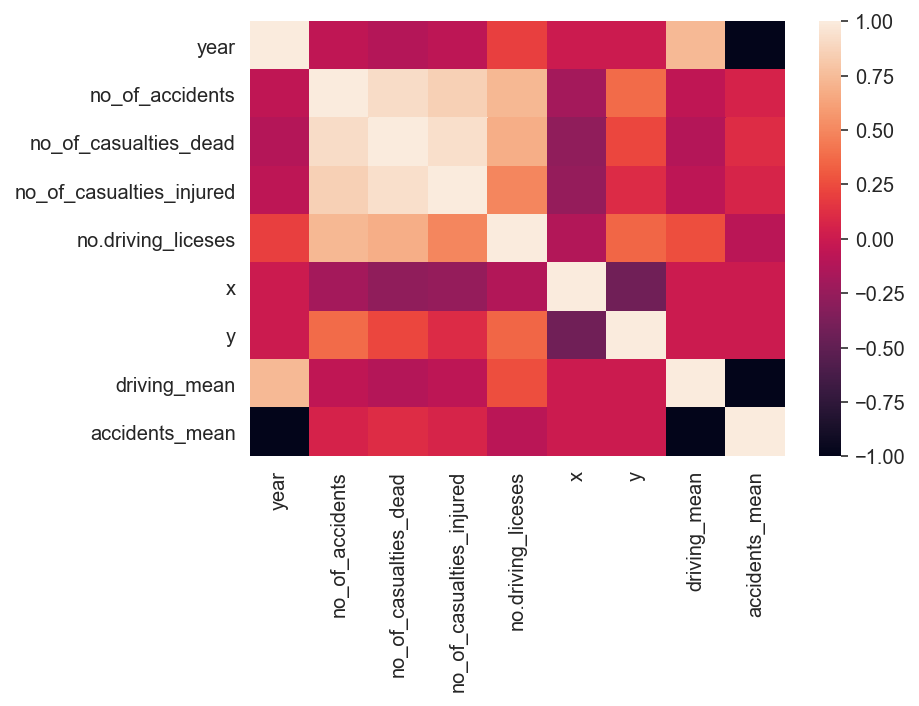

In [78]:
sns.heatmap(df_merge.corr())

In [79]:
def correlation_heat_map(df):
    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(11,7))

    # Generate a mask for the upper triangle (taken from the Seaborn example gallery):
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with Seaborn.
    # Assign the matplotlib axis the function returns. This allow us to resize the labels.
    ax = sns.heatmap(corrs, mask=mask, annot=True, vmin=-1, vmax=1)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=30)
    
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=15, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()

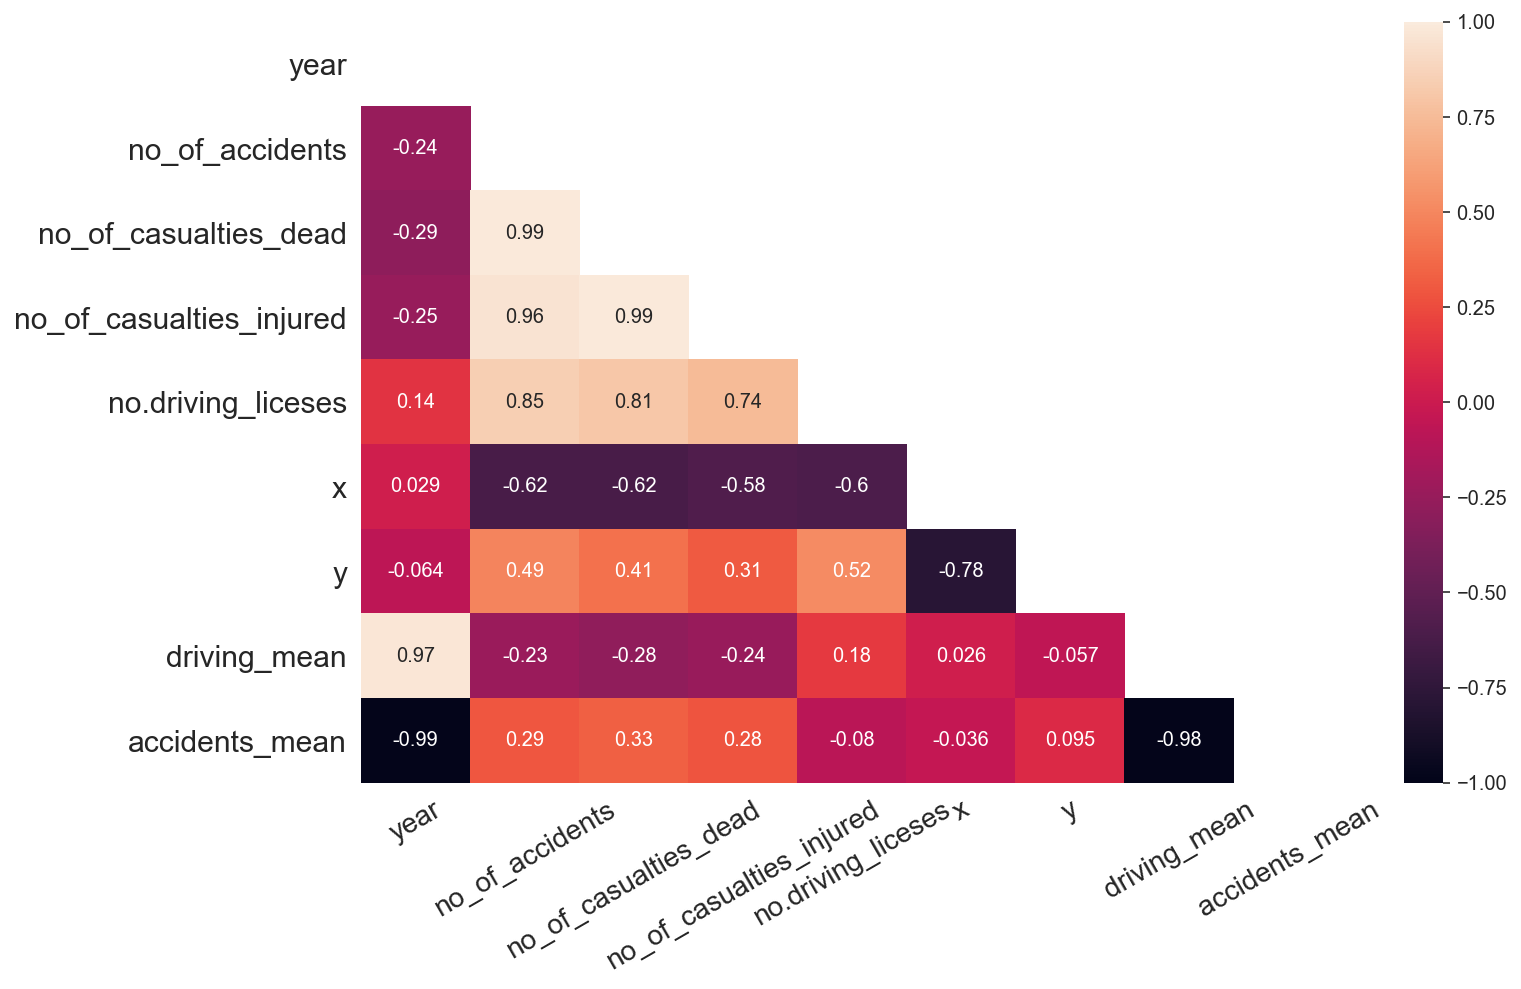

In [80]:
correlation_heat_map(df_merge.corr())

#### Define a custom function to subplot histograms

We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [81]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax= plt.subplots(nrows=1, ncols=2,figsize=(8,6)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Driving Licenses number
- Traffic Accidents number

Please plot two additional histograms that will help with your understanding of the data

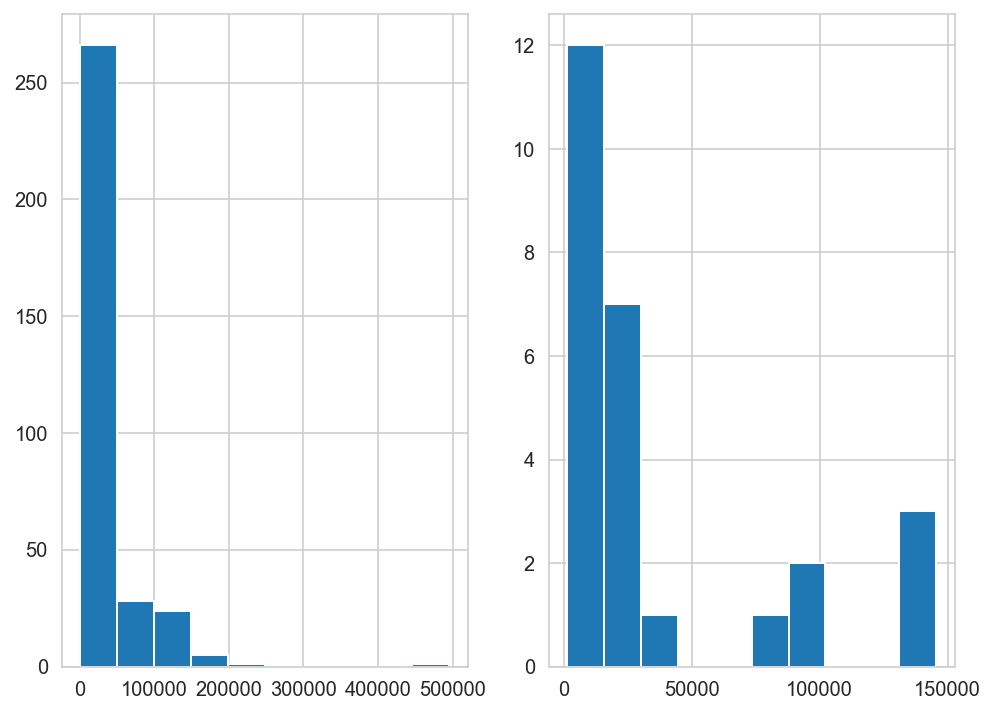

In [82]:
subplot_histograms(df_merge,['no.driving_liceses','no_of_accidents'],['no.driving_liceses','no_of_accidents'],['no.driving_liceses','no_of_accidents'])

#### Plot and interpret scatter plots

For each of the following:
- Driving Licenses vs. Traffic Accidents for 2017
- Driving Licenses vs. Traffic Accidents for 2016
- Driving Licenses for 2016 vs 2017
- Traffic Accidents for 2016 vs 2017

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [83]:
df_merge.describe()

,year,no_of_accidents,no_of_casualties_dead,no_of_casualties_injured,no.driving_liceses,x,y,driving_mean,accidents_mean
count,325.000000,26.000000,26.000000,26.000000,325.000000,325.000000,325.000000,325.000000,26.000000
mean,2005.000000,38225.692308,635.384615,2743.038462,28915.347692,23.810447,42.602789,28915.347692,38225.692308
std,7.222222,46493.705035,549.783381,2922.641127,47419.058819,4.197988,3.254196,12499.768992,2859.059464
min,1993.000000,1414.000000,112.000000,374.000000,915.000000,17.207232,37.259858,18278.692308,35422.153846
25%,1999.000000,10276.250000,241.250000,923.000000,4846.000000,20.148405,41.263690,20672.153846,35422.153846
50%,2005.000000,16050.500000,415.500000,1618.500000,10267.000000,23.288330,41.817119,25396.769231,38225.692308
75%,2011.000000,30981.250000,929.250000,3784.000000,25423.000000,27.400846,43.343000,30812.153846,41029.230769
max,2017.000000,145541.000000,2243.000000,12383.000000,495307.000000,30.197075,50.147830,71397.307692,41029.230769


###### Driving Licenses vs. Traffic Accidents for 2017

In [84]:
#first select Traffic Accidents in the year 2017
traffic_year_2017=df_merge[df_merge['year']==2017]['no_of_accidents']

In [85]:
#select Driving Licenses in the year 2017
driving_year_2017=df_merge[df_merge['year']==2017]['no.driving_liceses']

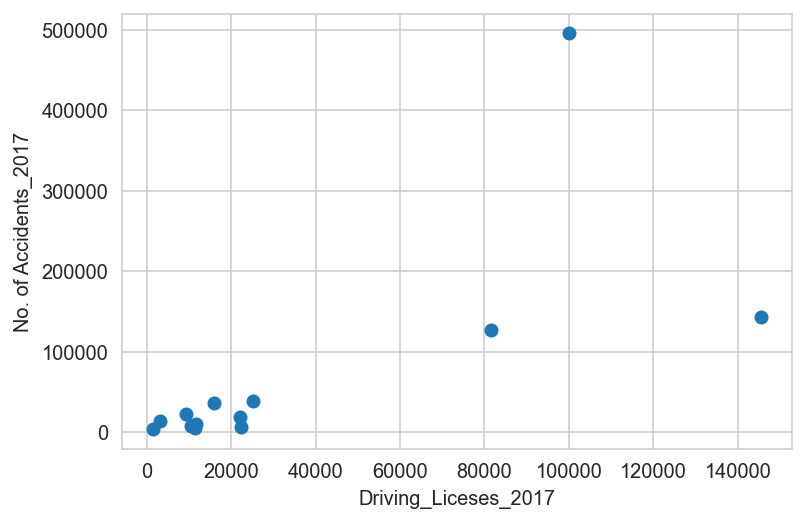

In [86]:
plt.scatter(traffic_year_2017,driving_year_2017);
plt.xlabel('Driving_Liceses_2017');
plt.ylabel('No. of Accidents_2017');

###### Driving Licenses vs. Traffic Accidents for 2016

In [87]:
#year_2016 = df_merge[df_merge['year']==2016]

In [88]:
traffic_year_2016=df_merge[df_merge['year']==2016]['no_of_accidents']

In [89]:
driving_year_2016=df_merge[df_merge['year']==2016]['no.driving_liceses']

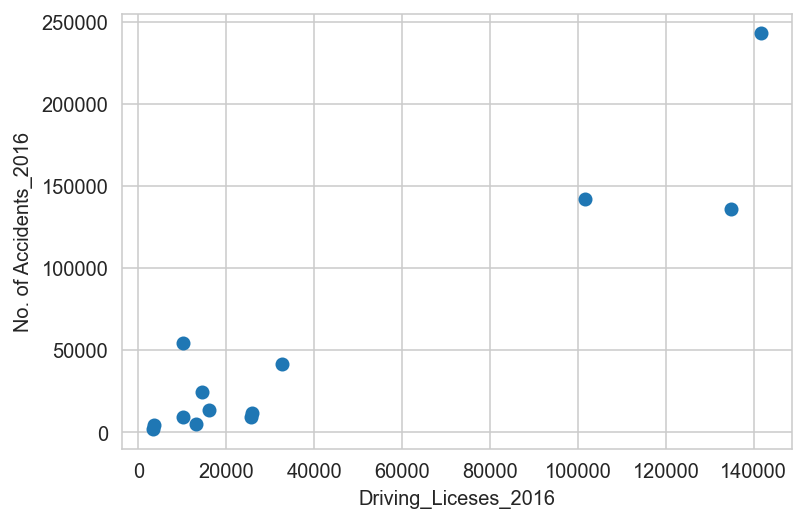

In [90]:
plt.scatter(traffic_year_2016,driving_year_2016);
plt.xlabel('Driving_Liceses_2016');
plt.ylabel('No. of Accidents_2016');

###### Driving Licenses for 2016 vs 2017

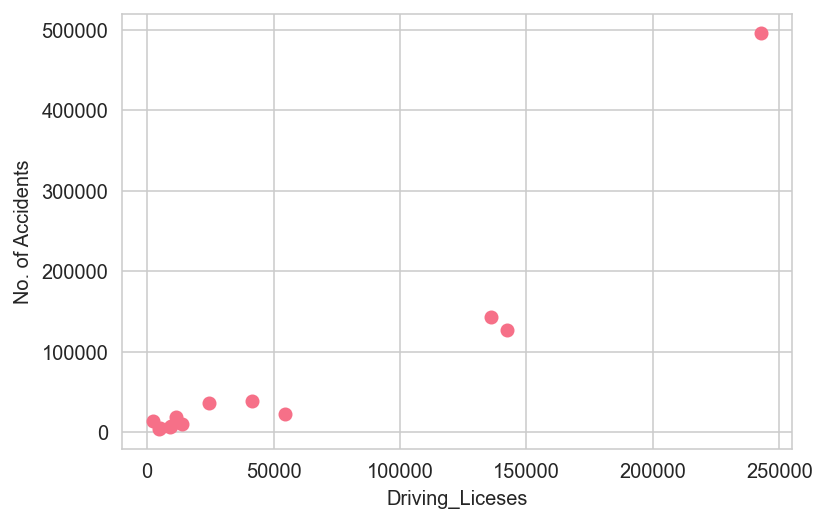

In [91]:
plt.scatter(driving_year_2016,driving_year_2017, color='#f67088');
plt.xlabel('Driving_Liceses');
plt.ylabel('No. of Accidents');

###### Traffic Accidents for 2016 vs 2017

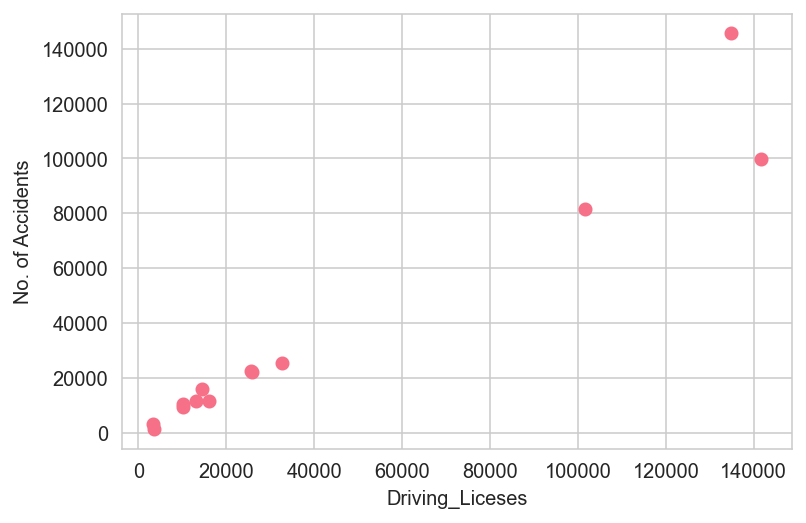

In [92]:
plt.scatter(traffic_year_2016,traffic_year_2017,color='#f67088');
plt.xlabel('Driving_Liceses');
plt.ylabel('No. of Accidents');

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

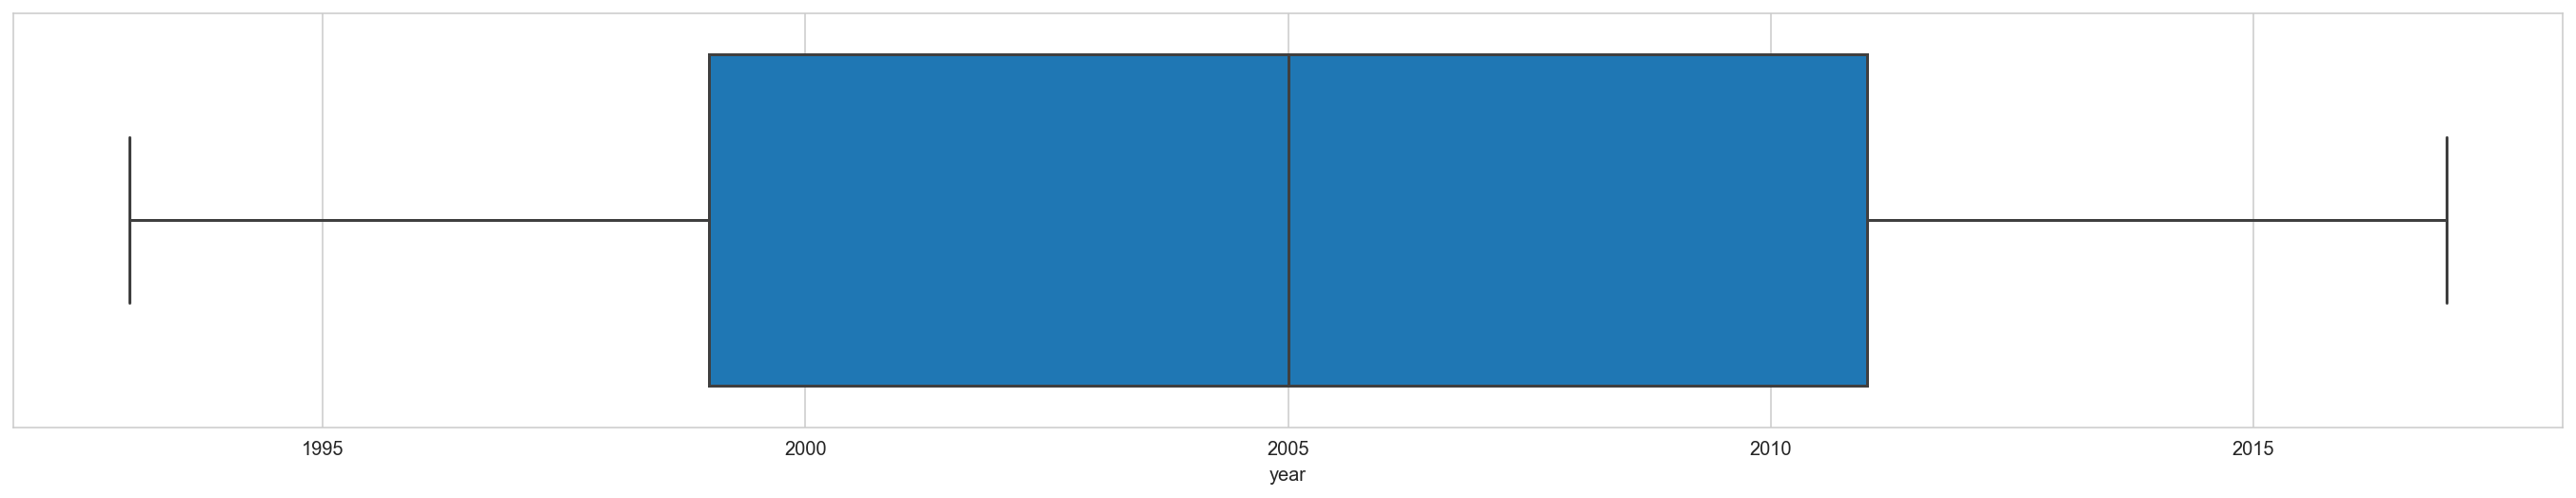

In [93]:
fig, ax = plt.subplots(figsize=(24, 4))
sns.boxplot(x='year',  orient='h', fliersize=8, linewidth=1.5, saturation=1, ax=ax ,data=df_merge);

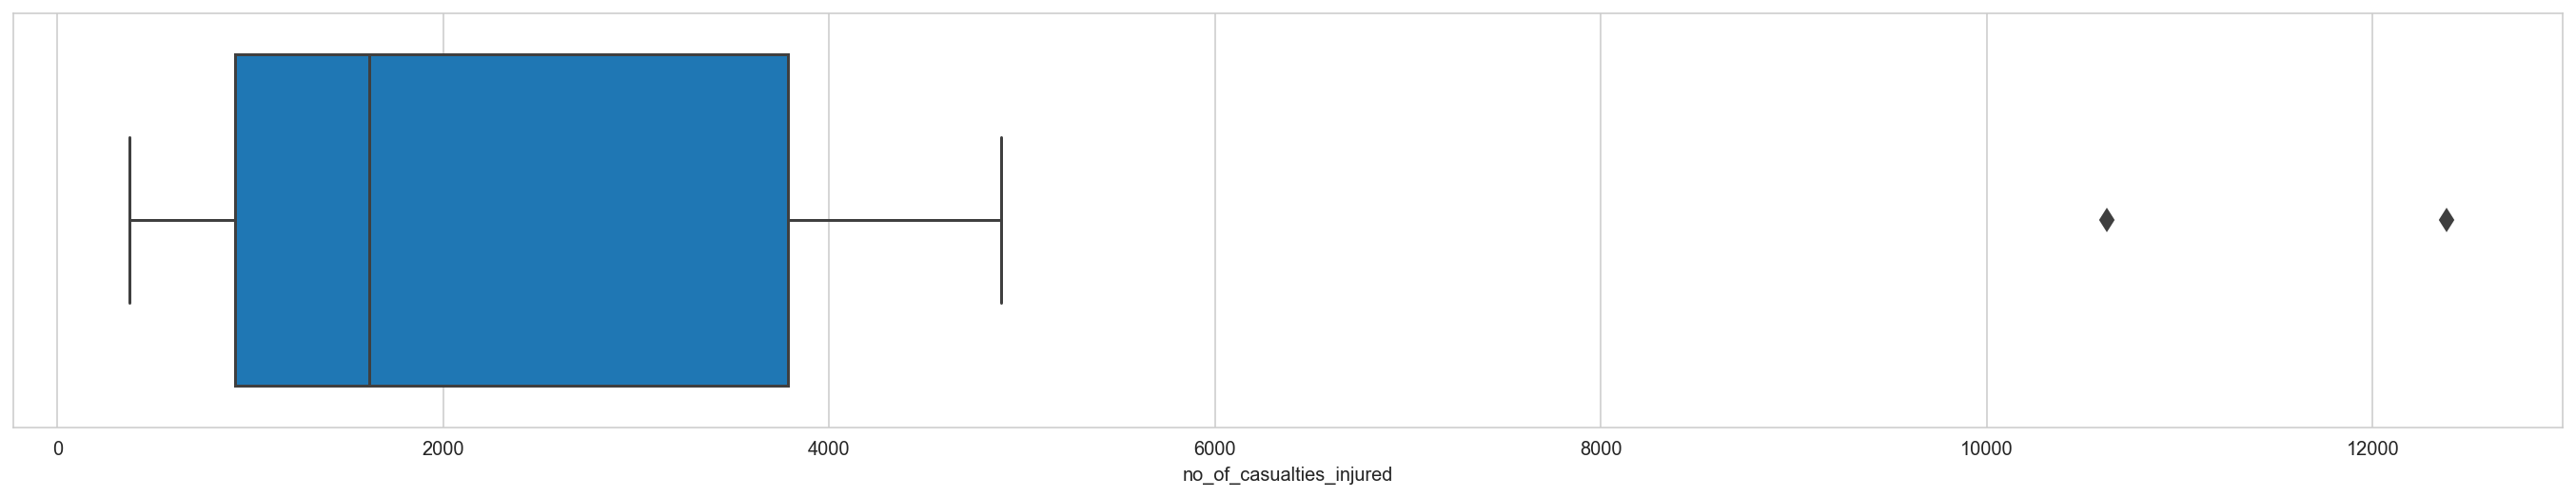

In [94]:
#no_of_accidents	no_of_casualties_dead	no_of_casualties_injured	no.driving_liceses	x	y	driving_mean
fig, ax = plt.subplots(figsize=(24,4))
sns.boxplot(x='no_of_casualties_injured',  orient='h', fliersize=8, linewidth=1.5, saturation=1, ax=ax ,data=df_merge);

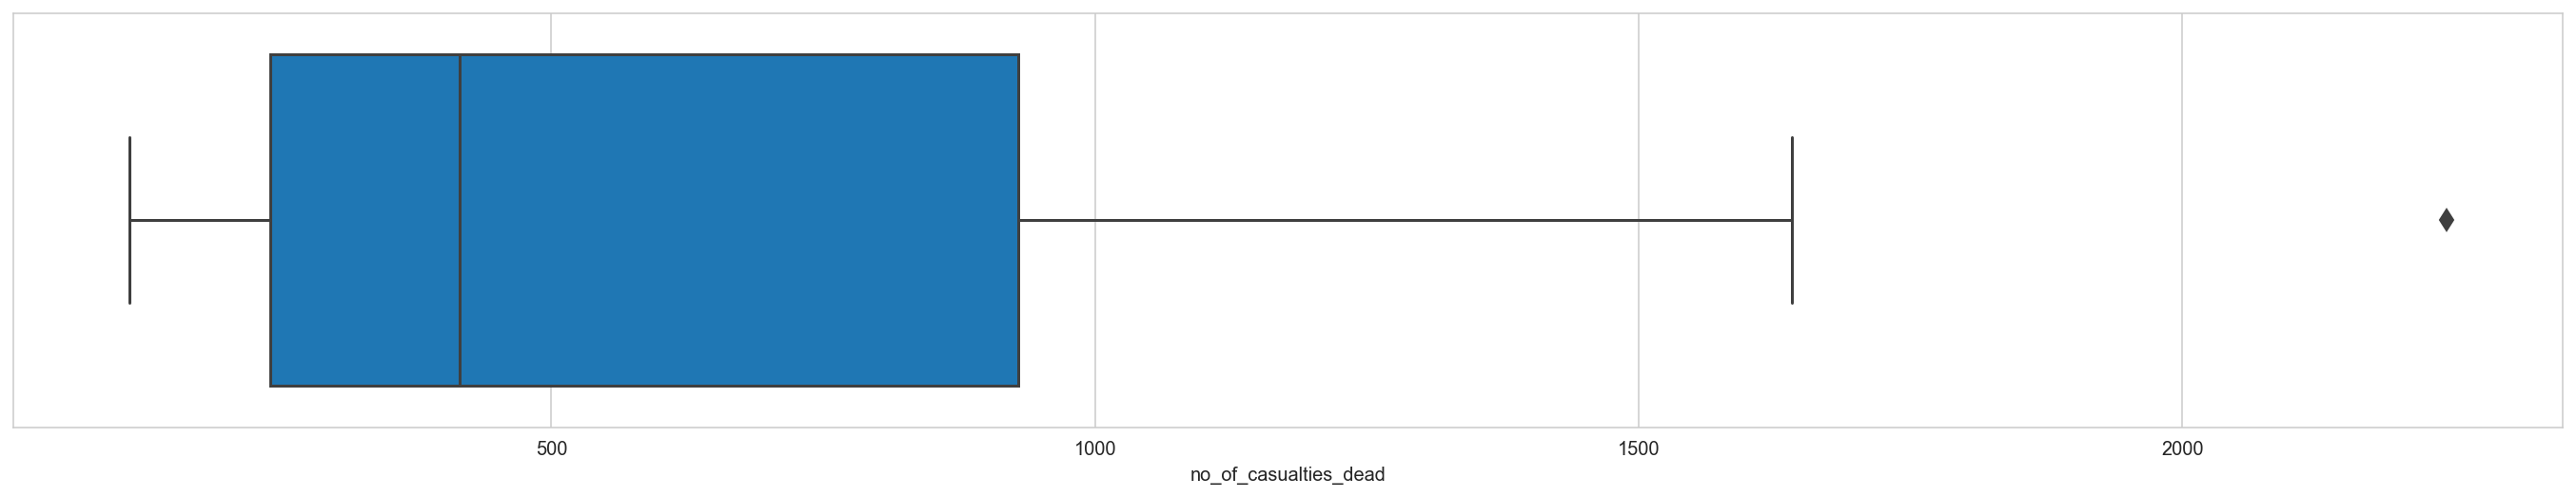

In [95]:
fig, ax = plt.subplots(figsize=(24,4))
sns.boxplot(x='no_of_casualties_dead',  orient='h', fliersize=8, linewidth=1.5, saturation=1, ax=ax ,data=df_merge);

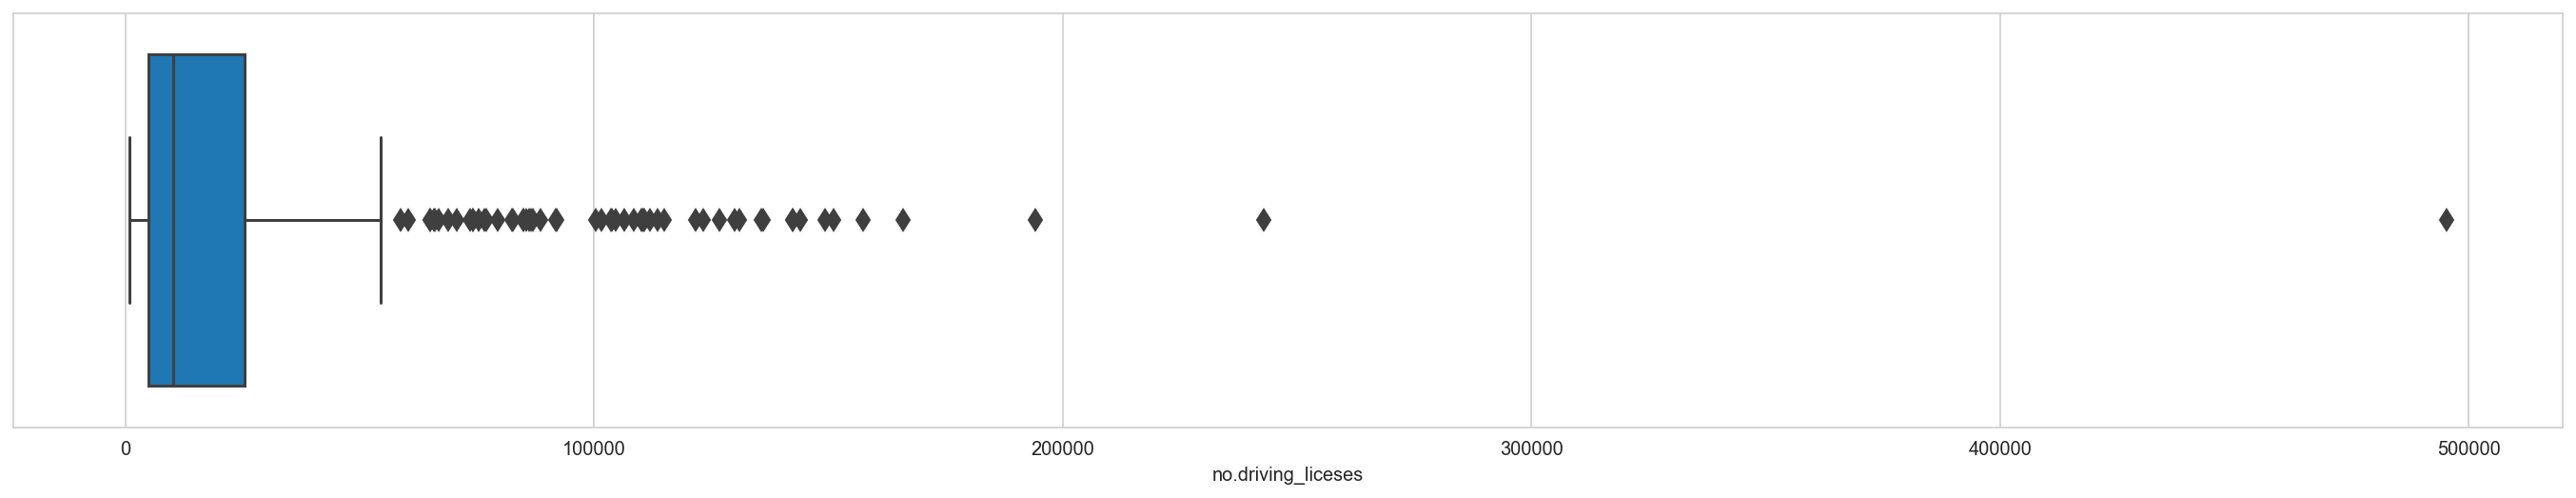

In [96]:
fig, ax = plt.subplots(figsize=(24,4))
sns.boxplot(x='no.driving_liceses',  orient='h', fliersize=8, linewidth=1.5, saturation=1, ax=ax ,data=df_merge);

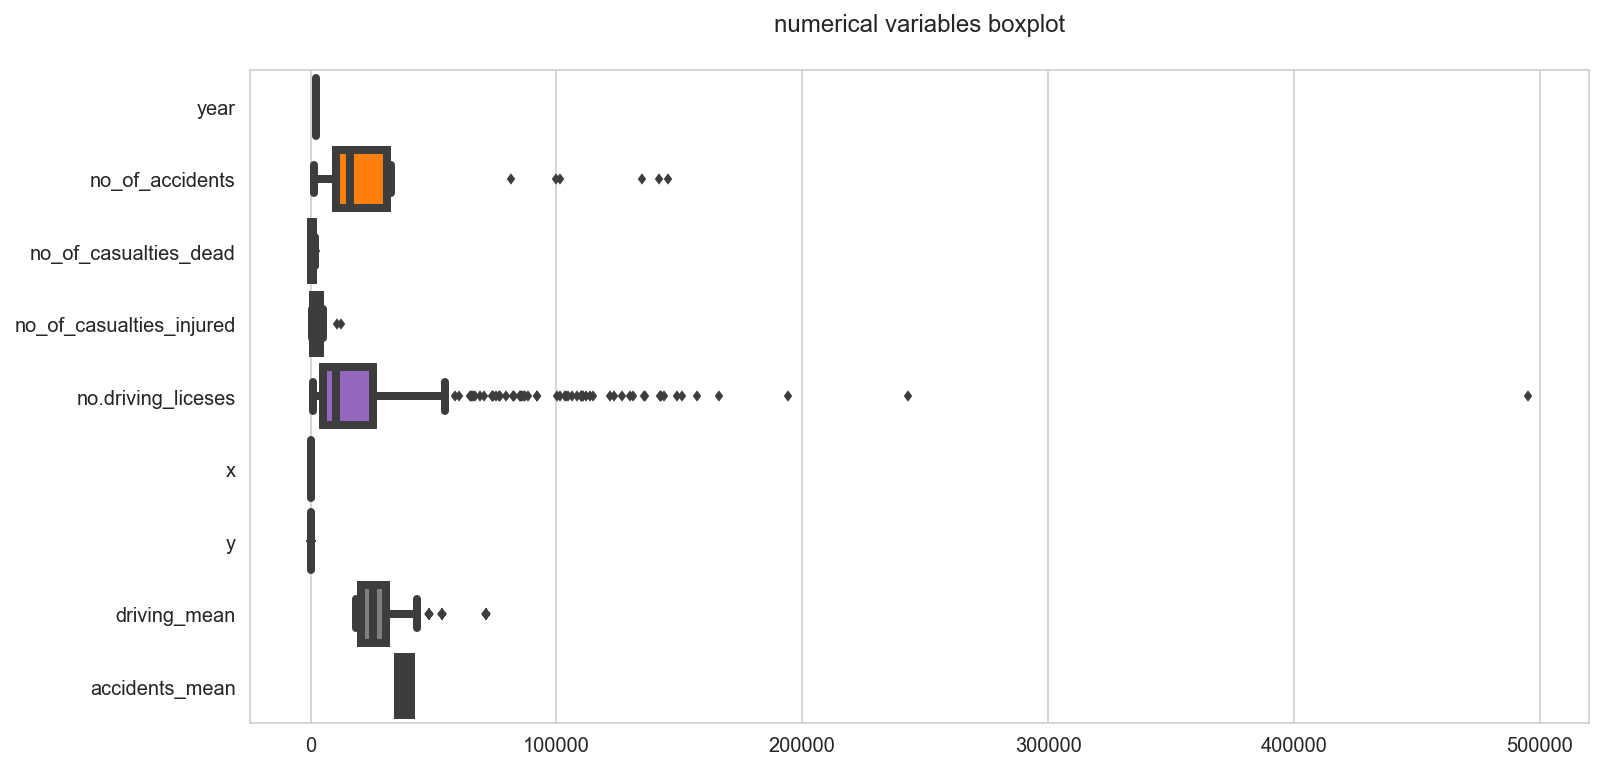

In [97]:
fig = plt.figure(figsize=(12,6))
ax = fig.gca()
df_merge
sns.boxplot(data=df_merge, orient='h', fliersize=3, linewidth=4, 
                 saturation=1, ax=ax)

ax.set_title('numerical variables boxplot\n')
plt.show()

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [98]:
df_merge.head()

,region,year,no_of_accidents,no_of_casualties_dead,no_of_casualties_injured,no.driving_liceses,x,y,driving_mean,accidents_mean
0,Al-Baaha,2016,3618.0,185.0,1227.0,4614,20.148405,41.466548,53616.692308,41029.230769
1,Al-Jouf,2016,10212.0,245.0,920.0,9371,29.967745,39.557037,53616.692308,41029.230769
2,Asir,2016,32684.0,983.0,2541.0,41367,19.138784,42.941470,53616.692308,41029.230769
3,Eastern Region,2016,101619.0,1113.0,4893.0,142307,23.288330,50.147830,53616.692308,41029.230769
4,Hail,2016,10199.0,299.0,932.0,54507,27.400846,41.440696,53616.692308,41029.230769


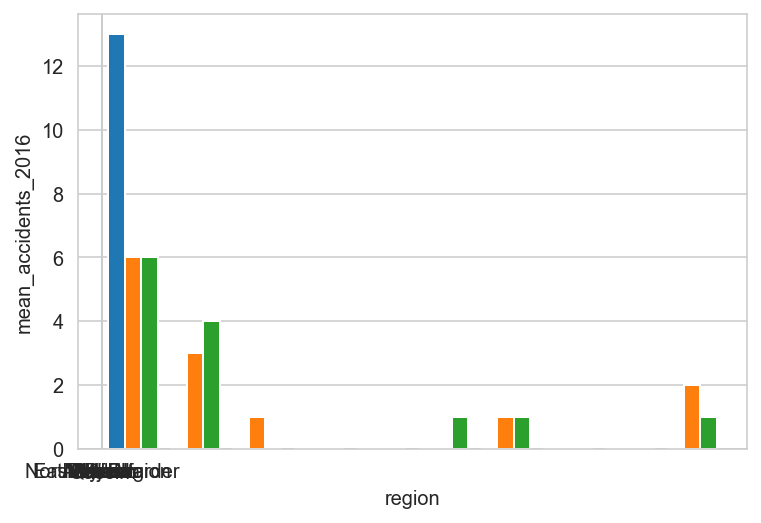

In [125]:
#graph of mean of accidents in 2016

plt.hist(mean_2016_2017)
plt.xlabel("region")
plt.ylabel("mean_accidents_2016")
plt.show()


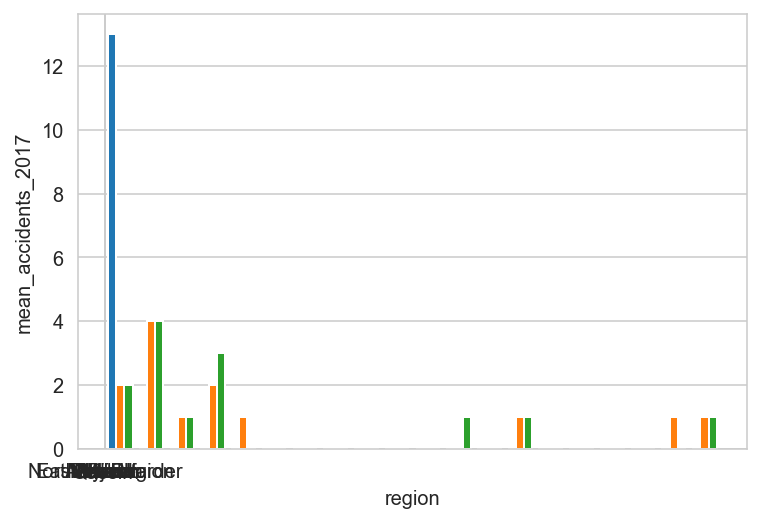

In [100]:
#graph of mean of accidents in 2017
plt.hist(mean_2016_2017,bins=20)
plt.xlabel("region")
plt.ylabel("mean_accidents_2017")
plt.show()

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:
No i found the data are not normally distribution

Does This Assumption Hold for:
    - Driving Licenses
    - Traffic Accidents
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:
The data is not normally distributed and there are outliers. I think the dataset is small ,so the distribution looked skewed. if  the data increased, the distribution will be more normal

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [101]:
df_merge.describe()

,year,no_of_accidents,no_of_casualties_dead,no_of_casualties_injured,no.driving_liceses,x,y,driving_mean,accidents_mean
count,325.000000,26.000000,26.000000,26.000000,325.000000,325.000000,325.000000,325.000000,26.000000
mean,2005.000000,38225.692308,635.384615,2743.038462,28915.347692,23.810447,42.602789,28915.347692,38225.692308
std,7.222222,46493.705035,549.783381,2922.641127,47419.058819,4.197988,3.254196,12499.768992,2859.059464
min,1993.000000,1414.000000,112.000000,374.000000,915.000000,17.207232,37.259858,18278.692308,35422.153846
25%,1999.000000,10276.250000,241.250000,923.000000,4846.000000,20.148405,41.263690,20672.153846,35422.153846
50%,2005.000000,16050.500000,415.500000,1618.500000,10267.000000,23.288330,41.817119,25396.769231,38225.692308
75%,2011.000000,30981.250000,929.250000,3784.000000,25423.000000,27.400846,43.343000,30812.153846,41029.230769
max,2017.000000,145541.000000,2243.000000,12383.000000,495307.000000,30.197075,50.147830,71397.307692,41029.230769


I want to compare between mode , mean and median, to see if the mean of columns are greater than median

In [102]:
var_tend = df_merge['no_of_accidents']
mean=var_tend.mean()
median=var_tend.median()
mode=var_tend.mode()
print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

Mean:  38225.692307692305 
Median:  16050.5 
Mode:  1414.0


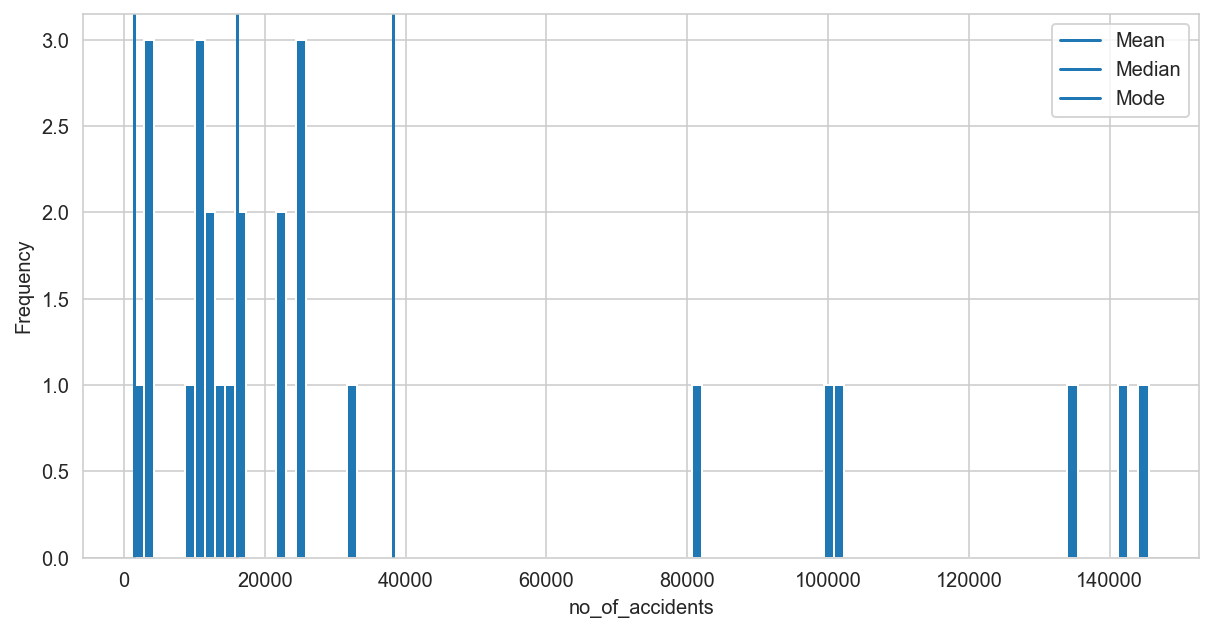

In [103]:
plt.figure(figsize=(10,5))
plt.hist(var_tend,bins=100)
plt.axvline(mean,label='Mean')
plt.axvline(median,label='Median')
plt.axvline(mode[0],label='Mode')
plt.xlabel('no_of_accidents')
plt.ylabel('Frequency')
plt.legend()
plt.show()

As we can see the graph in positive skewd

In [104]:
df_merge['no_of_accidents'].max()-df_merge['no_of_accidents'].min()

144127.0

In [105]:
df_merge['no_of_accidents'].var()

2161664607.9015384

In [106]:
sqrt(df_merge['no_of_accidents'].var())

46493.70503521459

In [107]:
df_merge['no_of_accidents'].quantile(0.5)

16050.5

In [108]:
q3 = df_merge['no_of_accidents'].quantile(0.75)
q3

30981.25

In [109]:
#25th percentile
q1 = df_merge['no_of_accidents'].quantile(0.25)
q1

10276.25

In [110]:
#interquartile range
IQR = q3  - q1
IQR

20705.0

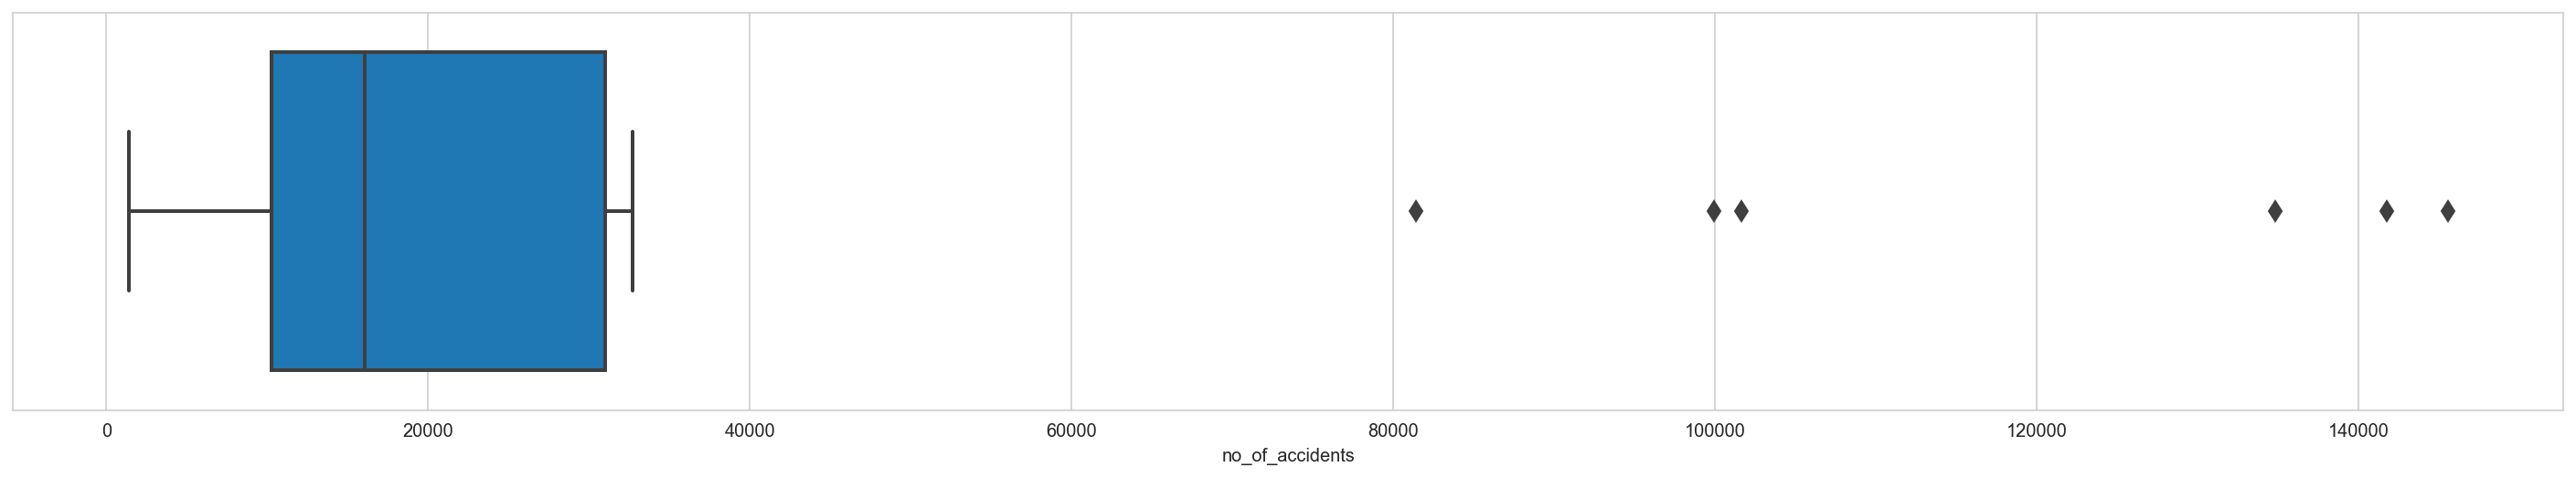

In [111]:
fig, ax = plt.subplots(figsize=(25, 4))
sns.boxplot(x='no_of_accidents',orient='h', fliersize=8, linewidth=2, saturation=6, ax=ax ,data=df_merge);

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset.

In [112]:
from scipy.stats import normaltest, skew

numeric_columns = ['no_of_accidents','no_of_casualties_dead','no_of_casualties_injured','no.driving_liceses']
for i in numeric_columns:
    if normaltest(df_merge[i].dropna())[1]<0.01: 
             print("The null hypothesis can be rejected for the {} feature ".format(i))
    else:
             print("The null hypothesis cannot be rejected for the {} feature ".format(i))

The null hypothesis can be rejected for the no_of_accidents feature 
The null hypothesis can be rejected for the no_of_casualties_dead feature 
The null hypothesis can be rejected for the no_of_casualties_injured feature 
The null hypothesis can be rejected for the no.driving_liceses feature 


In [113]:
for i in numeric_columns:
    if skew(df_merge[i].dropna())>0: 
             print("distribution is skewed positive for the {} feature ".format(i))
    elif skew(df_merge[i].dropna())<0:
             print("distribution is skewed negative for the {} feature ".format(i))
    else:
             print("no skeweness for the {} feature ".format(i))

distribution is skewed positive for the no_of_accidents feature 
distribution is skewed positive for the no_of_casualties_dead feature 
distribution is skewed positive for the no_of_casualties_injured feature 
distribution is skewed positive for the no.driving_liceses feature 


## Outside Research

Based upon your observations, choose **three** regions that demonstrate interesting trends in the number of driving licenses and traffic accidents. Spend some time doing outside research on provincial and central policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Answer:

In [114]:
df_merge.groupby(['region','year']).agg({'no_of_accidents':['sum'],'no_of_casualties_dead':['sum'],'no_of_casualties_injured':['sum']},inplace=True)

no_of_accidents no_of_casualties_dead no_of_casualties_injured
                          sum                   sum                      sum
region   year                                                               
Al-Baaha 1993             0.0                   0.0                      0.0
         1994             0.0                   0.0                      0.0
         1995             0.0                   0.0                      0.0
         1996             0.0                   0.0                      0.0
         1997             0.0                   0.0                      0.0
...                       ...                   ...                      ...
Tabouk   2013             0.0                   0.0                      0.0
         2014             0.0                   0.0                      0.0
         2015             0.0                   0.0                      0.0
         2016         16031.0                 434.0                   1724.0
         2017         11713.0                 348.0                   1243.0

[325 rows x 3 columns]

In [115]:
df_merge.nlargest(10,'no_of_accidents')[['region','year']]

,region,year
20,Makkah,2017
11,Riyadh,2016
7,Makkah,2016
3,Eastern Region,2016
24,Riyadh,2017
16,Eastern Region,2017
2,Asir,2016
5,Jazan,2016
10,Qassim,2016
15,Asir,2017


In [117]:
df_merge.nsmallest(10,'no_of_accidents')[['region','year']]

,region,year
13,Al-Baaha,2017
21,Najran,2017
8,Najran,2016
0,Al-Baaha,2016
17,Hail,2017
4,Hail,2016
1,Al-Jouf,2016
14,Al-Jouf,2017
22,Northern Boarder,2017
25,Tabouk,2017


I would like to see traffic accidents in the eastern region,because it is one of the regions that recorded a high rate in 2016

In [118]:
df_merge[df_merge['region']== 'Eastern Region']

,region,year,no_of_accidents,no_of_casualties_dead,no_of_casualties_injured,no.driving_liceses,x,y,driving_mean,accidents_mean
3,Eastern Region,2016,101619.0,1113.0,4893.0,142307,23.28833,50.14783,53616.692308,41029.230769
16,Eastern Region,2017,81433.0,963.0,4073.0,126816,23.28833,50.14783,71397.307692,35422.153846
42,Eastern Region,2015,NaN,NaN,NaN,135752,23.28833,50.14783,33495.307692,NaN
110,Eastern Region,2011,NaN,NaN,NaN,151087,23.28833,50.14783,30812.153846,NaN
111,Eastern Region,2012,NaN,NaN,NaN,129971,23.28833,50.14783,31631.076923,NaN
190,Eastern Region,2013,NaN,NaN,NaN,123325,23.28833,50.14783,43485.692308,NaN
191,Eastern Region,1996,NaN,NaN,NaN,8461,23.28833,50.14783,18278.692308,NaN
192,Eastern Region,2002,NaN,NaN,NaN,85035,23.28833,50.14783,21695.230769,NaN
193,Eastern Region,2000,NaN,NaN,NaN,65767,23.28833,50.14783,21018.307692,NaN
194,Eastern Region,2001,NaN,NaN,NaN,74119,23.28833,50.14783,20363.461538,NaN


In [124]:
df_merge[df_merge['region']=='Eastern Region'][df_merge['year']==2016]

C:\anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,region,year,no_of_accidents,no_of_casualties_dead,no_of_casualties_injured,no.driving_liceses,x,y,driving_mean,accidents_mean
3,Eastern Region,2016,101619.0,1113.0,4893.0,142307,23.28833,50.14783,53616.692308,41029.230769


I found data from the Eastern Region traffic that it decreased the accidint rate in 2018, after developing plans and strategies to solve the problem. This databset is not updated and needs more data to be able to delve into my research

In [123]:
df_merge.region.unique()

array(['Al-Baaha', 'Al-Jouf', 'Asir', 'Eastern Region', 'Hail', 'Jazan',
       'Madinah', 'Makkah', 'Najran', 'Northern Boarder', 'Qassim',
       'Riyadh', 'Tabouk'], dtype=object)

Summary, I noticed that in most regions in 2017, traffic accidents decreased with an increase in the issued of driving licenses, except for some regions Makkah ,Madinah and Al-jawf

## Conclusions and Recommendations

- Based on your exploration of the data, what are you key takeaways and recommendations?
- Are there additional data you desire that would better inform your investigations?

Answer:
Based on past data from the accident dataset, we can refer to multiple parameters, such as some issues with Data Set not all of the data appearing ,Each datasets are not clearly stated there is no day and month.  In Dataset driver's licenses, the drivers ages are not mentioned in order to find out the highest age group that causes traffic accidents.



I recommend solutions to reduce accidents in the Kingdom of Saudi Arabia, which found that Riyadh and Makkah are the highest rate of increase in traffic accidents. Through knowing the area, can be educated people about the importance of adhering to traffic instructions and modifying or closing dangerous roads and street lighting in some remote areas.  In the driving test center, drivers must be trained and sensitized, and the quality of the tests provided must be ensured